### 모델링 2트

In [36]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest# 환경 설정

import matplotlib
# 한글 설치(윈도우 버전)
matplotlib.rc('font',family='Malgun Gothic')
# 음수 표시
matplotlib.rc('axes',unicode_minus=False)
# 그래프 출력
%matplotlib inline

# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

In [24]:


samsung = pd.read_csv('krx/stocks/삼성전자.csv')

samsung['Date']=pd.to_datetime(samsung['Date'])
samsung.dropna(inplace=True)

In [27]:
samsung.head()

,Date,Open,High,Low,Close,Volume,Change
1,2000-04-28,5500,6100,5460,6000,1510624,0.111111
2,2000-05-02,6200,6530,6120,6280,1446713,0.046667
3,2000-05-03,6240,6260,6090,6180,531786,-0.015924
4,2000-05-04,6220,6360,6140,6180,522021,0.000000
5,2000-05-08,6400,6700,6300,6560,1053944,0.061489


In [29]:
# 년도별 종가 패턴 확인

# "Year" 변수 추출
samsung['Year'] = pd.to_datetime(samsung['Date']).dt.year

samsung.head()

,Date,Open,High,Low,Close,Volume,Change,Year
1,2000-04-28,5500,6100,5460,6000,1510624,0.111111,2000
2,2000-05-02,6200,6530,6120,6280,1446713,0.046667,2000
3,2000-05-03,6240,6260,6090,6180,531786,-0.015924,2000
4,2000-05-04,6220,6360,6140,6180,522021,0.000000,2000
5,2000-05-08,6400,6700,6300,6560,1053944,0.061489,2000


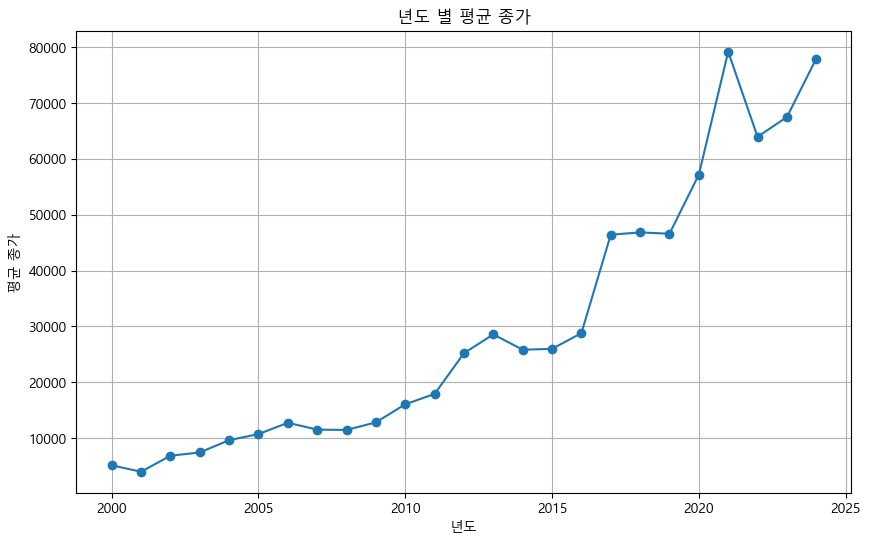

In [38]:
# 연도별로 그룹화하여 "Close" 값의 평균을 계산
samsung_Year_Close = samsung.groupby('Year')['Close'].mean()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(samsung_Year_Close.index, samsung_Year_Close.values, marker='o')
plt.title('년도 별 평균 종가')
plt.xlabel('년도')
plt.ylabel('평균 종가')
plt.grid(True)
plt.show()

In [43]:
# 첫 번째 구간: 2000년 ~ 2014년
df_2000_2014 = samsung[(samsung['Date'] >= '2000-01-01') & (samsung['Date'] < '2015-01-01')]

# 두 번째 구간: 2015년 ~ 2017년
df_2015_2017 = samsung[(samsung['Date'] >= '2015-01-01') & (samsung['Date'] < '2018-01-01')]

# 세 번째 구간: 2018년 ~ 2024년
df_2018_2024 = samsung[(samsung['Date'] >= '2018-01-01') & (samsung['Date'] <= '2024-12-31')]

# 구간별로 나눠진 데이터 확인
print("2000-2014 데이터:", df_2000_2014.shape)
print("2015-2017 데이터:", df_2015_2017.shape)
print("2018-2024 데이터:", df_2018_2024.shape)

2000-2014 데이터: (3630, 8)
2015-2017 데이터: (737, 8)
2018-2024 데이터: (1632, 8)


#### 상승/하락 분류 모델

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# 상승/하락 여부를 나타내는 target 변수 추가
df_2000_2014['Target'] = np.where(df_2000_2014['Close'].shift(-1) > df_2000_2014['Close'], 1, 0)

# 특징 변수와 타겟 변수 분리
X = df_2000_2014[['Open', 'High', 'Low', 'Volume', 'Change']]
y = df_2000_2014['Target']

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# 랜덤 포레스트 모델링
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 신뢰도(정확도)와 오분류표 계산
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)


Random Forest Accuracy: 0.4724517906336088
Random Forest Confusion Matrix:
 [[188 191]
 [192 155]]


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# 신뢰도(정확도) 계산
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# 오분류표(Confusion Matrix) 계산
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# 정밀도(Precision) 계산
rf_precision = precision_score(y_test, y_pred_rf)

# 재현율(Recall) 계산
rf_recall = recall_score(y_test, y_pred_rf)

# F1 점수 계산
rf_f1 = f1_score(y_test, y_pred_rf)

# 전체 성능 평가 지표 출력
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)

# 전체 성능 지표 보고서 출력 (정밀도, 재현율, F1 점수 포함)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.4724517906336088
Random Forest Confusion Matrix:
 [[188 191]
 [192 155]]
Random Forest Precision: 0.4479768786127168
Random Forest Recall: 0.44668587896253603
Random Forest F1 Score: 0.44733044733044736

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.50      0.50       379
           1       0.45      0.45      0.45       347

    accuracy                           0.47       726
   macro avg       0.47      0.47      0.47       726
weighted avg       0.47      0.47      0.47       726



In [50]:
# XGBoost 모델링
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 신뢰도(정확도)와 오분류표 계산
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Confusion Matrix:\n", xgb_conf_matrix)


XGBoost Accuracy: 0.4807162534435262
XGBoost Confusion Matrix:
 [[179 200]
 [177 170]]


In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# XGBoost 모델링
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 신뢰도(정확도) 계산
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

# 오분류표(Confusion Matrix) 계산
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# 정밀도(Precision) 계산
xgb_precision = precision_score(y_test, y_pred_xgb)

# 재현율(Recall) 계산
xgb_recall = recall_score(y_test, y_pred_xgb)

# F1 점수 계산
xgb_f1 = f1_score(y_test, y_pred_xgb)

# 전체 성능 평가 지표 출력
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Confusion Matrix:\n", xgb_conf_matrix)
print("XGBoost Precision:", xgb_precision)
print("XGBoost Recall:", xgb_recall)
print("XGBoost F1 Score:", xgb_f1)

# 전체 성능 지표 보고서 출력 (정밀도, 재현율, F1 점수 포함)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.4807162534435262
XGBoost Confusion Matrix:
 [[179 200]
 [177 170]]
XGBoost Precision: 0.4594594594594595
XGBoost Recall: 0.4899135446685879
XGBoost F1 Score: 0.47419804741980476

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.47      0.49       379
           1       0.46      0.49      0.47       347

    accuracy                           0.48       726
   macro avg       0.48      0.48      0.48       726
weighted avg       0.48      0.48      0.48       726



#### 상승/하락 모델 2

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# 상승/하락 여부를 나타내는 target 변수 추가
df_2015_2017['Target'] = np.where(df_2015_2017['Close'].shift(-1) > df_2015_2017['Close'], 1, 0)

# 특징 변수와 타겟 변수 분리
X = df_2015_2017[['Open', 'High', 'Low', 'Volume', 'Change']]
y = df_2015_2017['Target']

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# 랜덤 포레스트 모델링
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 신뢰도(정확도)와 오분류표 계산
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)


Random Forest Accuracy: 0.4864864864864865
Random Forest Confusion Matrix:
 [[28 40]
 [36 44]]


In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# 신뢰도(정확도) 계산
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# 오분류표(Confusion Matrix) 계산
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# 정밀도(Precision) 계산
rf_precision = precision_score(y_test, y_pred_rf)

# 재현율(Recall) 계산
rf_recall = recall_score(y_test, y_pred_rf)

# F1 점수 계산
rf_f1 = f1_score(y_test, y_pred_rf)

# 전체 성능 평가 지표 출력
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)

# 전체 성능 지표 보고서 출력 (정밀도, 재현율, F1 점수 포함)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.4864864864864865
Random Forest Confusion Matrix:
 [[28 40]
 [36 44]]
Random Forest Precision: 0.5238095238095238
Random Forest Recall: 0.55
Random Forest F1 Score: 0.5365853658536585

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.41      0.42        68
           1       0.52      0.55      0.54        80

    accuracy                           0.49       148
   macro avg       0.48      0.48      0.48       148
weighted avg       0.48      0.49      0.48       148



In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# 신뢰도(정확도) 계산
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# 오분류표(Confusion Matrix) 계산
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# 정밀도(Precision) 계산
rf_precision = precision_score(y_test, y_pred_rf)

# 재현율(Recall) 계산
rf_recall = recall_score(y_test, y_pred_rf)

# F1 점수 계산
rf_f1 = f1_score(y_test, y_pred_rf)

# 전체 성능 평가 지표 출력
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)

# 전체 성능 지표 보고서 출력 (정밀도, 재현율, F1 점수 포함)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.4864864864864865
Random Forest Confusion Matrix:
 [[28 40]
 [36 44]]
Random Forest Precision: 0.5238095238095238
Random Forest Recall: 0.55
Random Forest F1 Score: 0.5365853658536585

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.41      0.42        68
           1       0.52      0.55      0.54        80

    accuracy                           0.49       148
   macro avg       0.48      0.48      0.48       148
weighted avg       0.48      0.49      0.48       148



In [84]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# 신뢰도(정확도) 계산
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# 오분류표(Confusion Matrix) 계산
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# 정밀도(Precision) 계산
rf_precision = precision_score(y_test, y_pred_rf)

# 재현율(Recall) 계산
rf_recall = recall_score(y_test, y_pred_rf)

# F1 점수 계산
rf_f1 = f1_score(y_test, y_pred_rf)

# 전체 성능 평가 지표 출력
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)

# 전체 성능 지표 보고서 출력 (정밀도, 재현율, F1 점수 포함)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


# XGBoost 모델링
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 신뢰도(정확도) 계산
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

# 오분류표(Confusion Matrix) 계산
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# 정밀도(Precision) 계산
xgb_precision = precision_score(y_test, y_pred_xgb)

# 재현율(Recall) 계산
xgb_recall = recall_score(y_test, y_pred_xgb)

# F1 점수 계산
xgb_f1 = f1_score(y_test, y_pred_xgb)

# 전체 성능 평가 지표 출력
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Confusion Matrix:\n", xgb_conf_matrix)
print("XGBoost Precision:", xgb_precision)
print("XGBoost Recall:", xgb_recall)
print("XGBoost F1 Score:", xgb_f1)

# 전체 성능 지표 보고서 출력 (정밀도, 재현율, F1 점수 포함)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Random Forest Accuracy: 0.4864864864864865
Random Forest Confusion Matrix:
 [[28 40]
 [36 44]]
Random Forest Precision: 0.5238095238095238
Random Forest Recall: 0.55
Random Forest F1 Score: 0.5365853658536585

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.41      0.42        68
           1       0.52      0.55      0.54        80

    accuracy                           0.49       148
   macro avg       0.48      0.48      0.48       148
weighted avg       0.48      0.49      0.48       148

XGBoost Accuracy: 0.49324324324324326
XGBoost Confusion Matrix:
 [[29 39]
 [36 44]]
XGBoost Precision: 0.5301204819277109
XGBoost Recall: 0.55
XGBoost F1 Score: 0.5398773006134969

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.43      0.44        68
           1       0.53      0.55      0.54        80

    accuracy                           0.49       148
   macro avg    

#### 회귀모델

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 특징 변수와 타겟 변수 분리
X = df_2000_2014[['Open', 'High', 'Low', 'Volume', 'Change']]
y = df_2000_2014['Close']

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 랜덤 포레스트 회귀 모델링
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가: 평균 제곱 오차(MSE)와 결정 계수(R^2)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", rf_mse)
print("Random Forest R^2:", rf_r2)


Random Forest MSE: 10855.258760330586
Random Forest R^2: 0.9998048335263595


In [63]:
from xgboost import XGBRegressor

# XGBoost 회귀 모델링
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 성능 평가: 평균 제곱 오차(MSE)와 결정 계수(R^2)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost MSE:", xgb_mse)
print("XGBoost R^2:", xgb_r2)


XGBoost MSE: 12061.38696104403
XGBoost R^2: 0.9997831485722843


In [67]:
# 임계값(Threshold)을 설정하여 오분류표처럼 접근
threshold = 50  # 예측과 실제 값의 차이가 50을 넘으면 오분류로 간주

# 랜덤 포레스트 오분류표
rf_errors = np.abs(y_pred_rf - y_test) > threshold
rf_conf_matrix = confusion_matrix(~rf_errors, rf_errors)
print("Random Forest Confusion Matrix (with threshold = 50):\n", rf_conf_matrix)

# XGBoost 오분류표
xgb_errors = np.abs(y_pred_xgb - y_test) > threshold
xgb_conf_matrix = confusion_matrix(~xgb_errors, xgb_errors)
print("XGBoost Confusion Matrix (with threshold = 50):\n", xgb_conf_matrix)

Random Forest Confusion Matrix (with threshold = 50):
 [[  0 388]
 [338   0]]
XGBoost Confusion Matrix (with threshold = 50):
 [[  0 402]
 [324   0]]


### 모델링 3트

In [117]:
KOSPI=fdr.StockListing('KOSPI')
KOSPI.head(20)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,78400,2,-500,-0.63,77900,78600,77800,2756856,215378803200,468030951920000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,193300,2,-6400,-3.20,193000,195400,192000,1641890,317574927800,140722857154500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,347000,1,17000,5.15,333000,347000,332000,139548,47623844500,81198000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,922000,1,15000,1.65,913000,934000,913000,62336,57661924000,65622428000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,,252500,2,-3500,-1.37,257500,257500,252500,106996,27245071500,52877588227500,209416191,STK
5,005935,KR7005931001,삼성전자우,KOSPI,,62900,3,0,0.00,62500,62900,62300,150033,9397176900,51759573430000,822886700,STK
6,068270,KR7068270008,셀트리온,KOSPI,,197500,1,1300,0.66,198000,199900,196800,293614,58330030800,42861685025000,217021190,STK
7,000270,KR7000270009,기아,KOSPI,,103100,2,-300,-0.29,103400,103900,102600,178191,18398524000,41225402792700,399858417,STK
8,105560,KR7105560007,KB금융,KOSPI,,87800,2,-2100,-2.34,89600,89600,87300,324119,28615292700,35428272121600,403511072,STK
9,055550,KR7055550008,신한지주,KOSPI,,58500,1,100,0.17,58600,59200,58200,410722,24143064700,29799503019000,509393214,STK


In [224]:
KOSPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         958 non-null    object 
 1   ISU_CD       958 non-null    object 
 2   Name         958 non-null    object 
 3   Market       958 non-null    object 
 4   Dept         958 non-null    object 
 5   Close        958 non-null    object 
 6   ChangeCode   958 non-null    object 
 7   Changes      958 non-null    int64  
 8   ChagesRatio  958 non-null    float64
 9   Open         958 non-null    int64  
 10  High         958 non-null    int64  
 11  Low          958 non-null    int64  
 12  Volume       958 non-null    int64  
 13  Amount       958 non-null    int64  
 14  Marcap       958 non-null    int64  
 15  Stocks       958 non-null    int64  
 16  MarketId     958 non-null    object 
dtypes: float64(1), int64(8), object(8)
memory usage: 127.4+ KB


In [87]:
import FinanceDataReader as fdr

df = fdr.DataReader('005930').dropna()

X = []
Y = []

for i in range(len(df)-1):
    a = df.iloc[i].to_numpy()
    b= df.iloc[i+1]['Close']

    X.append(a)
    Y.append(b)

In [123]:
# # 분석할 주식 코드 목록

# # 빈 리스트를 만들어서 모든 주식 데이터를 통합할 준비
# X = []
# Y = []

# # 각 주식 코드에 대해 데이터 불러오고 처리
# for code in stock_codes:
#     df = fdr.DataReader(code).dropna()  # 데이터 불러오기 및 결측값 제거
    
#     # 주식 데이터가 비어있지 않은 경우에만 처리
#     if not df.empty:
#         # 데이터프레임의 모든 열을 특성으로 변환하여 `X`에 추가
#         for i in range(len(df) - 1):
#             a = df.iloc[i].to_numpy()
#             b = df.iloc[i + 1]['Close']
            
#             X.append(a)
#             Y.append(b)

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

train_x, test_x , train_y , test_y = train_test_split(X,Y,shuffle=True)

rf = RandomForestRegressor()
rf.fit(train_x,train_y)
rf.score(test_x,test_y)



0.9992467747290984

In [158]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 분석할 주식 코드 목록
stock_codes = ['005930', '000660', '373220', '207940','004100','011700','481850','120030','015590','019440','003610',
               '077500','396690','012600','017900','000180','014710','350520','023450','267290','111380','008260','163560']

# 빈 리스트를 만들어서 모든 주식 데이터를 통합할 준비
X = []
Y = []

# 각 주식 코드에 대해 데이터 불러오고 처리
for code in stock_codes:
    df = fdr.DataReader(code).dropna()  # 데이터 불러오기 및 결측값 제거
    
    # 주식 데이터가 비어있지 않은 경우에만 처리
    if not df.empty:
        # 'Close' 열의 데이터만 사용
        close_prices = df['Close'].values
        
        # 윈도우 사이즈와 예측 기간 설정
        window_size = 5  # 윈도우 사이즈 (일수)
        next_date = 1     # 예측 기간 (일수)
        
        for i in range(len(close_prices) - window_size - next_date):
            # 현재 윈도우와 그에 따른 예측 값을 추출
            window = close_prices[i:i + window_size]
            target = close_prices[i + window_size + next_date]
            
            X.append(window)
            Y.append(target)


# X와 Y를 numpy 배열로 변환
X = np.array(X)
Y = np.array(Y)


In [162]:
# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)


# 랜덤 포레스트 회귀 모델 생성 및 학습
model = RandomForestRegressor()
model.fit(X_train, Y_train)

# 테스트 데이터에 대해 예측 수행
Y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

r2_score = model.score(X_test, Y_test)
print(f'R^2 Score: {r2_score}')

# 예측 결과 확인
print('Sample Predictions:')
for i in range(min(5, len(Y_pred))):
    print(f'Actual: {Y_test[i]}, Predicted: {Y_pred[i]}')

Mean Squared Error: 13485154.899270127
R^2 Score: 0.9986388281941347
Sample Predictions:
Actual: 1678, Predicted: 1758.67
Actual: 1242, Predicted: 1214.24
Actual: 3815, Predicted: 3900.72
Actual: 4240, Predicted: 4202.5
Actual: 22700, Predicted: 23317.0


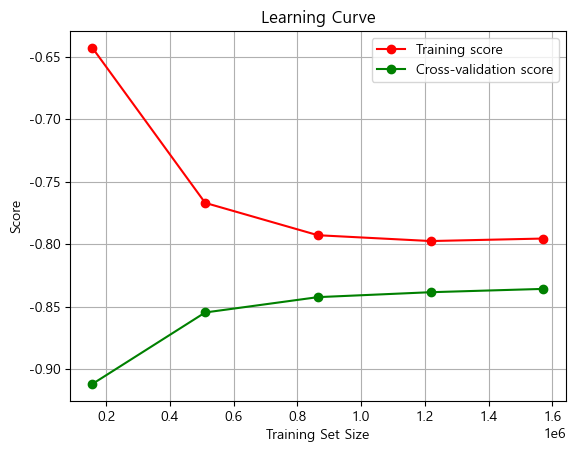

In [255]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=5, scoring='r2')

# 평균 및 표준편차 계산
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Learning Curve 시각화
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [215]:
import xgboost as xgb

# XGBoost 회귀 모델 생성 및 학습
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)

# XGBoost 회귀 모델 생성 및 하이퍼파라미터 조정
model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    eval_metric='rmse', 
    learning_rate=0.1,  # 낮은 학습률
    n_estimators=500,    # 더 많은 트리
    max_depth=5,         # 적당한 깊이
    subsample=0.8,       # 데이터 샘플 비율
    colsample_bytree=0.8, # 특성 샘플 비율
    alpha=0.1,           # L1 정규화
         # L2 정규화
    random_state=42
)
model.fit(X_train, Y_train)

# 테스트 데이터에 대해 예측 수행
Y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

r2_score = model.score(X_test, Y_test)
print(f'R^2 Score: {r2_score}')

# 예측 결과 확인
print('Sample Predictions:')
for i in range(min(5, len(Y_pred))):
    print(f'Actual: {Y_test[i]}, Predicted: {Y_pred[i]}')

Mean Squared Error: 0.24668679593536325
R^2 Score: 0.001007468330766259
Sample Predictions:
Actual: 0, Predicted: 0.01812831498682499
Actual: 0, Predicted: 0.47841161489486694
Actual: 1, Predicted: 0.5057719945907593
Actual: 1, Predicted: 0.44600483775138855
Actual: 0, Predicted: 0.35572460293769836


#### 분류 모델

In [229]:
import FinanceDataReader as fdr
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

# KOSPI 데이터에서 주식 코드 추출
KOSPI = fdr.StockListing('KOSPI')
stock_codes = KOSPI['Code'].tolist()

# 사용하고 싶은 주식 코드의 수를 제한 
stock_codes = stock_codes[:450]


# 빈 리스트를 만들어서 모든 주식 데이터를 통합할 준비
X = []
Y = []

# 각 주식 코드에 대해 데이터 불러오고 처리
for code in stock_codes:
    try:
        df = fdr.DataReader(code).dropna()  # 데이터 불러오기 및 결측값 제거
        
        # 주식 데이터가 비어있지 않은 경우에만 처리
        if not df.empty:
            close_prices = df['Close'].values
            window_size = 10  # 윈도우 사이즈 (일수)
            next_date = 1     # 예측 기간 (일수)
            
            for i in range(len(close_prices) - window_size - next_date):
                window = close_prices[i:i + window_size]
                target = 1 if close_prices[i + window_size + next_date] > close_prices[i + window_size] else 0
                
                X.append(window)
                Y.append(target)
                
    except Exception as e:
        print(f"Error processing code {code}: {e}")

# X와 Y를 numpy 배열로 변환
X = np.array(X)
Y = np.array(Y)



In [262]:
# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

# XGBoost 분류 모델 생성 및 학습
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
model.fit(X_train, Y_train)

# 테스트 데이터에 대해 예측 수행
Y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(Y_test, Y_pred)
print(f'Classification Report:\n{class_report}')

# 예측 결과 확인
print('Sample Predictions:')
for i in range(min(5, len(Y_pred))):
    print(f'Actual: {Y_test[i]}, Predicted: {Y_pred[i]}')


Accuracy: 0.5467607411289953
Confusion Matrix:
[[208613   6264]
 [171869   6276]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.97      0.70    214877
           1       0.50      0.04      0.07    178145

    accuracy                           0.55    393022
   macro avg       0.52      0.50      0.38    393022
weighted avg       0.53      0.55      0.41    393022

Sample Predictions:
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0


In [221]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE

# SMOTE를 통한 오버샘플링
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, shuffle=True, random_state=42)

# 하이퍼파라미터 조정
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, Y_train)

# 최적의 파라미터 출력
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

# 최적의 모델로 예측 수행
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(Y_test, Y_pred)
print(f'Classification Report:\n{class_report}')

# 예측 결과 확인
print('Sample Predictions:')
for i in range(min(5, len(Y_pred))):
    print(f'Actual: {Y_test.iloc[i]}, Predicted: {Y_pred[i]}')


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'scale_pos_weight': 1, 'subsample': 1.0}
Best score: 0.5333349849536567
Accuracy: 0.5272424578750883
Confusion Matrix:
[[4984 4954]
 [4417 5467]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.50      0.52      9938
           1       0.52      0.55      0.54      9884

    accuracy                           0.53     19822
   macro avg       0.53      0.53      0.53     19822
weighted avg       0.53      0.53      0.53     19822

Sample Predictions:


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

#### 기업 식별자 번호와 함께 예측 망함

In [1]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

# KOSPI 데이터에서 주식 코드 추출
KOSPI = fdr.StockListing('KOSPI')
stock_codes = KOSPI['Code'].tolist()

# 사용하고 싶은 주식 코드의 수를 제한 
stock_codes = stock_codes[:20]

# 빈 리스트를 만들어서 모든 주식 데이터를 통합할 준비
X = []
Y = []
company_ids = []  # 기업 식별자를 저장할 리스트

# 각 주식 코드에 대해 데이터 불러오고 처리
for code in stock_codes:
    try:
        df = fdr.DataReader(code).dropna()  # 데이터 불러오기 및 결측값 제거
        
        # 주식 데이터가 비어있지 않은 경우에만 처리
        if not df.empty:
            close_prices = df['Close'].values

            # 지수 이동 평균 (EMA) 및 MACD 계산
            ema_12 = pd.Series(close_prices).ewm(span=12, adjust=False).mean().values
            ema_26 = pd.Series(close_prices).ewm(span=26, adjust=False).mean().values
            ema_50 = pd.Series(close_prices).ewm(span=50, adjust=False).mean().values
            ema_200 = pd.Series(close_prices).ewm(span=200, adjust=False).mean().values

            macd = ema_12 - ema_26
            signal_line = pd.Series(macd).ewm(span=9, adjust=False).mean().values

            # 기업 식별자를 원-핫 인코딩 형태로 생성
            company_id = np.zeros(len(stock_codes))
            company_id[stock_codes.index(code)] = 1

            # 윈도우 사이즈와 예측 기간 설정
            window_size = 10  # 윈도우 사이즈 (일수)
            next_date = 1     # 예측 기간 (일수)

            for i in range(len(close_prices) - window_size - next_date):
                window = close_prices[i:i + window_size]
                
                # EMA 및 MACD 지표 추가
                ema_window = ema_50[i:i + window_size]
                macd_window = macd[i:i + window_size]
                signal_window = signal_line[i:i + window_size]
                
                # 특성 벡터 생성 (기업 식별자 포함)
                features = np.concatenate([window, ema_window, macd_window, signal_window, company_id])
                
                # 타겟 값 설정
                target = 1 if close_prices[i + window_size + next_date] > close_prices[i + window_size] else 0

                # 데이터 추가
                X.append(features)
                Y.append(target)
                company_ids.append(stock_codes.index(code))  # 해당 데이터가 어떤 기업에 속하는지 기록
                
    except Exception as e:
        print(f"Error processing code {code}: {e}")

# X와 Y를 numpy 배열로 변환
X = np.array(X)
Y = np.array(Y)
company_ids = np.array(company_ids)  # 기업 식별자도 numpy 배열로 변환

In [3]:
# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, Y_train, Y_test, company_ids_train, company_ids_test = train_test_split(X, Y, company_ids, test_size=0.2, shuffle=True, random_state=42)

# XGBoost 분류 모델 생성 및 학습
model = xgb.XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    learning_rate=0.1, 
    n_estimators=100, 
    max_depth=5, 
    subsample=0.8, 
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, Y_train)

# 테스트 데이터에 대해 예측 수행
Y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(Y_test, Y_pred)
print(f'Classification Report:\n{class_report}')

# 예측 결과 확인 (기업 식별자 포함)
print('Sample Predictions:')
for i in range(min(5, len(Y_pred))):
    actual_company = stock_codes[company_ids_test[i]]
    print(f'Company: {actual_company}, Actual: {Y_test[i]}, Predicted: {Y_pred[i]}')

Accuracy: 0.525225674253752
Confusion Matrix:
[[7724 1786]
 [6787 1760]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.81      0.64      9510
           1       0.50      0.21      0.29      8547

    accuracy                           0.53     18057
   macro avg       0.51      0.51      0.47     18057
weighted avg       0.52      0.53      0.48     18057

Sample Predictions:
Company: 055550, Actual: 1, Predicted: 1
Company: 035420, Actual: 0, Predicted: 0
Company: 005490, Actual: 1, Predicted: 0
Company: 055550, Actual: 0, Predicted: 0
Company: 086790, Actual: 0, Predicted: 0


In [5]:
# 예측 결과 확인
print('Sample Predictions:')
for i in range(min(5, len(Y_pred))):
    print(f'Company: {stock_codes[int(company_ids_test[i])]}, Date: {dates_test[i].strftime("%Y-%m-%d")}, Actual: {Y_test[i]}, Predicted: {Y_pred[i]}')

Sample Predictions:


NameError: name 'dates_test' is not defined

In [8]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

# 분석할 주식 코드 목록 (기업 식별자 추가)
stock_codes = ['041190', '015750', '215200']  # 예시: 3개의 주식 코드

# 빈 리스트를 만들어서 모든 주식 데이터를 통합할 준비
X = []
Y = []
company_ids = []  # 기업 식별자를 저장할 리스트
dates = []  # 날짜를 저장할 리스트

# 각 주식 코드에 대해 데이터 불러오고 처리
for code in stock_codes:
    try:
        df = fdr.DataReader(code).dropna()  # 데이터 불러오기 및 결측값 제거
        
        # 주식 데이터가 비어있지 않은 경우에만 처리
        if not df.empty:
            close_prices = df['Close'].values
            date_index = df.index  # 날짜 인덱스 추가

            # 지수 이동 평균 (EMA) 및 MACD 계산
            ema_12 = pd.Series(close_prices).ewm(span=12, adjust=False).mean().values
            ema_26 = pd.Series(close_prices).ewm(span=26, adjust=False).mean().values
            ema_50 = pd.Series(close_prices).ewm(span=50, adjust=False).mean().values
            ema_200 = pd.Series(close_prices).ewm(span=200, adjust=False).mean().values

            macd = ema_12 - ema_26
            signal_line = pd.Series(macd).ewm(span=9, adjust=False).mean().values

            # 기업 식별자를 원-핫 인코딩 형태로 생성
            company_id = np.zeros(len(stock_codes))
            company_id[stock_codes.index(code)] = 1

            # 윈도우 사이즈와 예측 기간 설정
            window_size = 10  # 윈도우 사이즈 (일수)
            next_date = 1     # 예측 기간 (일수)

            for i in range(len(close_prices) - window_size - next_date):
                window = close_prices[i:i + window_size]
                
                # EMA 및 MACD 지표 추가
                ema_window = ema_50[i:i + window_size]
                macd_window = macd[i:i + window_size]
                signal_window = signal_line[i:i + window_size]
                
                # 특성 벡터 생성 (기업 식별자 포함)
                features = np.concatenate([ema_window, macd_window, signal_window, company_id])
                
                # Signals 계산
                signals = [2]  # 초기값 (교차 없음)
                for j in range(1, len(macd)):
                    if ((macd[j-1] < signal_line[j-1]) and (macd[j] > signal_line[j])) or \
                       ((ema_50[j-1] < ema_200[j-1]) and (ema_50[j] > ema_200[j])):
                        signals.append(1)  # 매수 신호
                    elif ((macd[j-1] > signal_line[j-1]) and (macd[j] < signal_line[j])) or \
                         ((ema_50[j-1] > ema_200[j-1]) and (ema_50[j] < ema_200[j])):
                        signals.append(0)  # 매도 신호
                    else:
                        signals.append(2)  # 교차 없음
                
                # 타겟 값을 현재 윈도우의 마지막 인덱스에 대해 설정
                if i + window_size + next_date < len(signals):
                    target = signals[i + window_size + next_date]
                    X.append(features)
                    Y.append(target)
                    company_ids.append(stock_codes.index(code))  # 해당 데이터가 어떤 기업에 속하는지 기록
                    dates.append(date_index[i + window_size + next_date])  # 예측된 날짜 추가
                
    except Exception as e:
        print(f"Error processing code {code}: {e}")

# X와 Y를 numpy 배열로 변환
X = np.array(X)
Y = np.array(Y)
company_ids = np.array(company_ids)
dates = np.array(dates)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=True, random_state=42
)

# company_ids와 dates도 함께 분할
company_ids_train, company_ids_test, dates_train, dates_test = train_test_split(
    company_ids, dates, test_size=0.2, shuffle=True, random_state=42
)

# XGBoost 분류 모델 생성 및 학습
model = xgb.XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    learning_rate=0.1, 
    n_estimators=100, 
    max_depth=5, 
    subsample=0.8, 
    colsample_bytree=0.8,
    scale_pos_weight=1,
    random_state=42
)
model.fit(X_train, Y_train)

# 테스트 데이터에 대해 예측 수행
Y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(Y_test, Y_pred)
print(f'Classification Report:\n{class_report}')

# 예측 결과 확인
print('Sample Predictions:')
for i in range(min(5, len(Y_pred))):
    print(f'Company: {stock_codes[int(company_ids_test[i])]}, Date: {dates_test[i].strftime("%Y-%m-%d")}, Actual: {Y_test[i]}, Predicted: {Y_pred[i]}')


C:\Users\campus4D046\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:02:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9219957835558679
Confusion Matrix:
[[   0    0  112]
 [   0    0  110]
 [   0    0 2624]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.00      0.00      0.00       110
           2       0.92      1.00      0.96      2624

    accuracy                           0.92      2846
   macro avg       0.31      0.33      0.32      2846
weighted avg       0.85      0.92      0.88      2846

Sample Predictions:
Company: 041190, Date: 2009-03-03, Actual: 2, Predicted: 2
Company: 015750, Date: 2018-10-16, Actual: 2, Predicted: 2
Company: 015750, Date: 2010-06-08, Actual: 2, Predicted: 2
Company: 041190, Date: 2022-12-23, Actual: 2, Predicted: 2
Company: 215200, Date: 2020-08-13, Actual: 2, Predicted: 2


C:\Users\campus4D046\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\campus4D046\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\campus4D046\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# 새로운 데이터에 대한 예측 수행
def predict_new_data(new_data):
    """
    새로운 데이터에 대해 예측 수행하는 함수
    :param new_data: 예측할 데이터의 특성 벡터 (numpy array)
    :return: 예측된 값
    """
    predictions = model.predict(new_data)
    return predictions

# 예시: 새로운 데이터에 대한 예측
# 이 부분에서 X 값을 넣어서 예측을 수행할 수 있습니다
example_features = X_test[:5]  # 예를 들어, 테스트 데이터의 앞부분 5개를 예시로 사용
predicted_values = predict_new_data(example_features)

print('Example Predictions:')
for i in range(len(example_features)):
    company_id = int(company_ids_test[i])
    company_code = stock_codes[company_id] if company_id < len(stock_codes) else "Unknown"
    print(f'Company: {company_code}, Date: {dates_test[i].strftime("%Y-%m-%d")}, Actual: {Y_test[i]}, Predicted: {predicted_values[i]}')

Example Predictions:
Company: 041190, Date: 2009-03-03, Actual: 2, Predicted: 2
Company: 015750, Date: 2018-10-16, Actual: 2, Predicted: 2
Company: 015750, Date: 2010-06-08, Actual: 2, Predicted: 2
Company: 041190, Date: 2022-12-23, Actual: 2, Predicted: 2
Company: 215200, Date: 2020-08-13, Actual: 2, Predicted: 2


In [13]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# KOSPI 데이터에서 주식 코드 추출
KOSPI = fdr.StockListing('KOSPI')
stock_codes = KOSPI['Code'].tolist()

# 사용하고 싶은 주식 코드의 수를 제한
stock_codes = stock_codes[:20]

# 빈 리스트를 만들어서 모든 주식 데이터를 통합할 준비
X = []
Y = []
company_ids = []  # 기업 식별자를 저장할 리스트

# 각 주식 코드에 대해 데이터 불러오고 처리
for code in stock_codes:
    try:
        df = fdr.DataReader(code).dropna()  # 데이터 불러오기 및 결측값 제거
        
        # 주식 데이터가 비어있지 않은 경우에만 처리
        if not df.empty:
            close_prices = df['Close'].values

            # 지수 이동 평균 (EMA) 및 MACD 계산
            ema_12 = pd.Series(close_prices).ewm(span=12, adjust=False).mean().values
            ema_26 = pd.Series(close_prices).ewm(span=26, adjust=False).mean().values
            ema_50 = pd.Series(close_prices).ewm(span=50, adjust=False).mean().values
            ema_200 = pd.Series(close_prices).ewm(span=200, adjust=False).mean().values

            macd = ema_12 - ema_26
            signal_line = pd.Series(macd).ewm(span=9, adjust=False).mean().values

            # 기업 식별자를 원-핫 인코딩 형태로 생성
            company_id = np.zeros(len(stock_codes))
            company_id[stock_codes.index(code)] = 1

            # 윈도우 사이즈와 예측 기간 설정
            window_size = 10  # 윈도우 사이즈 (일수)
            next_date = 1     # 예측 기간 (일수)

            for i in range(len(close_prices) - window_size - next_date):
                window = close_prices[i:i + window_size]
                
                # EMA 및 MACD 지표 추가
                ema_window = ema_50[i:i + window_size]
                macd_window = macd[i:i + window_size]
                signal_window = signal_line[i:i + window_size]
                
                # 특성 벡터 생성 (기업 식별자 포함)
                features = np.concatenate([window, ema_window, macd_window, signal_window, company_id])
                
                # 타겟 값 설정
                target = 1 if close_prices[i + window_size + next_date] > close_prices[i + window_size] else 0

                # 데이터 추가
                X.append(features)
                Y.append(target)
                company_ids.append(stock_codes.index(code))  # 해당 데이터가 어떤 기업에 속하는지 기록
                
    except Exception as e:
        print(f"Error processing code {code}: {e}")

# X와 Y를 numpy 배열로 변환
X = np.array(X)
Y = np.array(Y)
company_ids = np.array(company_ids)  # 기업 식별자도 numpy 배열로 변환

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, Y_train, Y_test, company_ids_train, company_ids_test = train_test_split(
    X, Y, company_ids, test_size=0.2, shuffle=True, random_state=42
)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 분류 모델 생성 및 학습
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
model.fit(X_train_scaled, Y_train)

# 테스트 데이터에 대해 예측 수행
Y_pred = model.predict(X_test_scaled)

# 모델 평가
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')



Accuracy: 0.5272193609126654


In [22]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 예측할 데이터 (특성 벡터) - 학습에 사용한 특성과 동일한 수
# 이 예시에서는 60개의 특성이 필요하다고 가정합니다.
a = np.array([79400, 80200, 78700, 22061478, 3000] + [0] * (60 - 5))  # 55개의 추가 특성을 0으로 채워서 맞춤

# 데이터 표준화 (학습 데이터에서 사용한 scaler를 사용해야 함)
# 학습 시 사용된 scaler 객체가 필요함
# 예를 들어, scaler는 학습 시 다음과 같이 정의되었을 것입니다:
# scaler = StandardScaler()
# scaler.fit(X_train)  # X_train에서 fit을 수행한 경우

# 이 예시에서는 scaler가 이미 정의되어 있어야 합니다.
# 예를 들어:
# scaler = StandardScaler()
# scaler.fit(X_train)
# a_scaled = scaler.transform([a])

# 데이터 표준화 (위와 같은 방식으로)
a_scaled = scaler.transform([a])

# 랜덤 포레스트 모델 객체
# model은 이미 학습되어 있어야 합니다.
# 예를 들어:
# model = RandomForestClassifier(...)
# model.fit(X_train, Y_train)

# 예측 수행
predicted_class = model.predict(a_scaled)
print(f'Predicted Class: {predicted_class[0]}')


Predicted Class: 0
